In [33]:
import module
from module import *
import importlib
importlib.reload(module)
import readpng as rpng

## Setting for data
## Nx;  number of data along "i"
## Ny: number of data  along "j"
#img=rpng.get_bwimg("./figure_make/fig2.png")
img=rpng.get_bwimg("./figure_make/che.png")
#img = 1-img

Nx, Ny = np.shape(img)
N_data = 1000

I_ans = np.zeros((Nx, Ny))


### Making answers 
## I_{i,j}:  matrix (Nx, Ny)         I_{i,j} = Ny * i + j

for i in range(Nx):
    for j in range(Ny):
        I_ans[i][j] = Ny * i  + j + (i-j)**3
        
I_ans = img
#Testing 1d-2d array conversion   I_{i,j} <-> vec_I
# vec_I; array (Nx*Ny)    vector corresponding to I_ans
# re_I: same as I_ans
# vec_I[j + Ny*x] = I_{0,0}   I_{0,1} ... 
# vec_I is returned to (re_I) via ravel() and reshape()

vec_I = I_ans.ravel()  
re_I = (vec_I.reshape(Nx, Ny))


## Data making
## random_generator: Function for making data
## d; array (N_data)      Observed data (sum of luminosity)
## g: tensor (N_data, Nx, Ny)      Weighting matrix in observation (
rand_now = random_generator(N_data, Nx, Ny)
d, A_ten=rand_now.make_data(I_ans,20) 
A_ten = np.array(A_ten)


## Testing tensor calculation "Sum_{j,k} (g_{i,j,k} * I_ans_{j,k} )"
## See d = g_{i,j,k}  I_ans_{j,k} 

#print ("Sum_{j,k} (A_ten_{i,j,k} I_ans_{j,k}) = ", np.einsum("ijk,jk->i", A_ten, I_ans))
#print ("d_{i}=", d)
#print ("They agree!!")

In [18]:
ana_main = main_sparse(d, A_ten)
l1_min, l1_max = -4, 3
ltsv_min, ltsv_max = -4, 3

l1_arr = [10**i for i in range(l1_min, l1_max+1)]
ltsv_arr = [10**i for i in range(ltsv_min, ltsv_max+1)]
ana_main.solve_without_cv(l1_arr,ltsv_arr, folder_name = "./cv_3")

l1: -4/3, ltsv: -4/3. elapsed time: 111.997992
total cost:0.133706, chi:0.001090, l1:0.122256, ltsv:0.010360 

l1: -4/3, ltsv: -3/3. elapsed time: 151.161161
total cost:0.219478, chi:0.001073, l1:0.122256, ltsv:0.096148 

l1: -4/3, ltsv: -2/3. elapsed time: 88.470990
total cost:1.048459, chi:0.025645, l1:0.122257, ltsv:0.900556 

l1: -4/3, ltsv: -1/3. elapsed time: 62.156116
total cost:8.468835, chi:0.558459, l1:0.122259, ltsv:7.788117 

l1: -4/3, ltsv: 0/3. elapsed time: 18.215045
total cost:68.290113, chi:7.688607, l1:0.122259, ltsv:60.479247 

l1: -4/3, ltsv: 1/3. elapsed time: 18.543272
total cost:495.648720, chi:82.187317, l1:0.122255, ltsv:413.339148 

l1: -4/3, ltsv: 2/3. elapsed time: 10.344238
total cost:3082.427324, chi:794.627818, l1:0.122241, ltsv:2287.677265 

l1: -4/3, ltsv: 3/3. elapsed time: 5.170568
total cost:14883.346952, chi:5564.923308, l1:0.122116, ltsv:9318.301528 

l1: -3/3, ltsv: -4/3. elapsed time: 96.535840
total cost:1.235047, chi:0.002090, l1:1.222562, ltsv

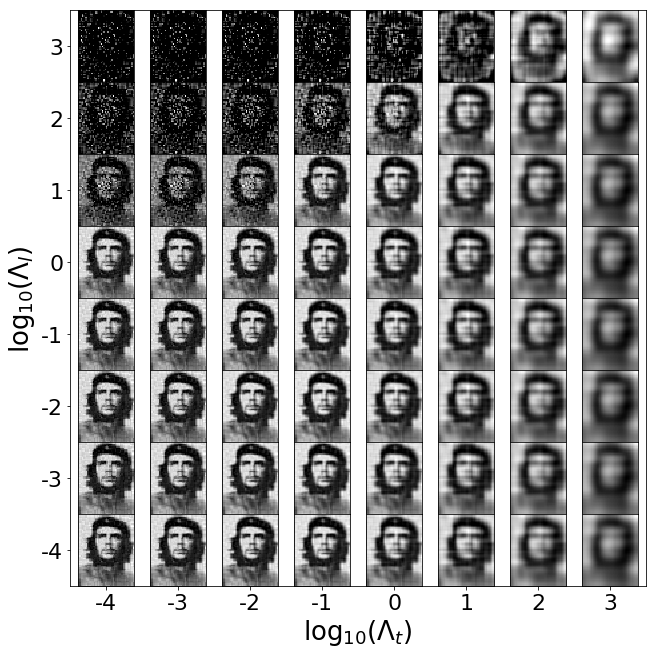

In [47]:
from module import *
import importlib
importlib.reload(module)
plotter = CVPlotter(len(l1_arr), len(ltsv_arr), l1_arr, ltsv_arr)
plotter.make_cv_figure("./cv_3_data", outfile ="test.png")


In [48]:
ana_main = main_sparse(d, A_ten)

l1_arr = [10**i for i in [-8,-6,-4,-2]]
ltsv_arr = [10**i for i in [-8,-6, -4, -2]]

ana_main.solve_without_cv(l1_arr,ltsv_arr, folder_name = "./cv_4")

l1: -8/-2, ltsv: -8/-2. elapsed time: 72.125228
total cost:0.003840, chi:0.003827, l1:0.000012, ltsv:0.000001 

l1: -8/-2, ltsv: -6/-2. elapsed time: 72.303350
total cost:0.003941, chi:0.003825, l1:0.000012, ltsv:0.000104 

l1: -8/-2, ltsv: -4/-2. elapsed time: 70.751508
total cost:0.014160, chi:0.003780, l1:0.000012, ltsv:0.010368 

l1: -8/-2, ltsv: -2/-2. elapsed time: 90.896965
total cost:0.936543, chi:0.021163, l1:0.000012, ltsv:0.915368 

l1: -6/-2, ltsv: -8/-2. elapsed time: 68.477128
total cost:0.005051, chi:0.003827, l1:0.001223, ltsv:0.000001 

l1: -6/-2, ltsv: -6/-2. elapsed time: 68.551280
total cost:0.005152, chi:0.003825, l1:0.001223, ltsv:0.000104 

l1: -6/-2, ltsv: -4/-2. elapsed time: 68.505686
total cost:0.015371, chi:0.003781, l1:0.001223, ltsv:0.010368 

l1: -6/-2, ltsv: -2/-2. elapsed time: 90.628151
total cost:0.937755, chi:0.021162, l1:0.001223, ltsv:0.915370 

l1: -4/-2, ltsv: -8/-2. elapsed time: 68.489863
total cost:0.126083, chi:0.003826, l1:0.122256, ltsv:0.0

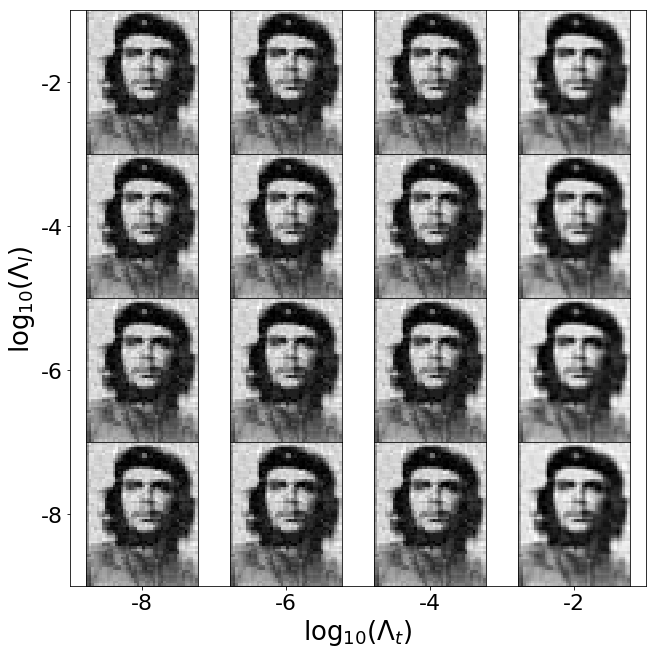

In [49]:
plotter = CVPlotter(len(l1_arr), len(ltsv_arr), l1_arr, ltsv_arr)
plotter.make_cv_figure("./cv_4_data", outfile ="test.png")

In [305]:
print (np.min(img), np.max(img), np.mean(img))
print (img[30,:])

0.0 1.0 0.53904337
[0.68235296 0.99607843 0.9882353  0.9843137  0.97647065 0.96078426
 0.5019608  0.05490196 0.10588235 0.11372549 0.1254902  0.12941177
 0.14117648 0.16862746 0.1764706  0.23921569 0.68235296 0.8784314
 0.8862745  0.8915033  0.9294117  0.9450981  0.9098039  0.85882354
 0.7411764  0.5176471  0.4117647  0.30588236 0.1882353  0.1882353
 0.18692811 0.14117648 0.10980392 0.11764706 0.11764706 0.1764706
 0.18431373 0.15555556 0.05882353 0.25490198 0.9647059  0.9738562 ]


In [292]:
print (Nx, Ny)

54 42


In [293]:

print (A_ten[0])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


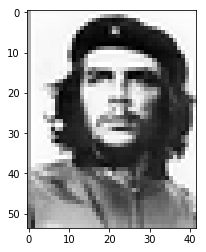

In [294]:
fig =plt.figure()
ax=fig.add_subplot(111)
ax.imshow(I_ans,cmap="gray")

plt.show()

In [295]:
from time import sleep
import module
from module import *
import importlib
importlib.reload(module)
import matplotlib.pyplot as plt
import cProfile

pr = cProfile.Profile()
pr.enable()
## Initial estimation of I
I_init = np.ones((Nx, Ny))+np.random.rand(Nx, Ny)

## main function for MFISTA
y = mfista_func(I_init, d ,A_ten = A_ten, print_func = True, eta = 1.5, lambda_tsv = 1e1,lambda_l1= 1e1,maxiter = 400)

pr.disable()


Current iteration: 0/400,  L: 6666.666667, cost: 672617.922791, cost_chiquare:511471.770538
Current iteration: 10/400,  L: 585.276635, cost: 18702.325995, cost_chiquare:397.036410
Current iteration: 20/400,  L: 877.914952, cost: 12576.744615, cost_chiquare:121.225115
Current iteration: 30/400,  L: 877.914952, cost: 7578.359585, cost_chiquare:134.711154
Current iteration: 40/400,  L: 585.276635, cost: 7194.055710, cost_chiquare:179.606536
Current iteration: 50/400,  L: 877.914952, cost: 7131.290464, cost_chiquare:170.911102
Current iteration: 60/400,  L: 585.276635, cost: 7124.472716, cost_chiquare:182.243526
Current iteration: 70/400,  L: 877.914952, cost: 7121.208151, cost_chiquare:178.855123
Current iteration: 80/400,  L: 585.276635, cost: 7118.349709, cost_chiquare:184.559293
Current iteration: 90/400,  L: 877.914952, cost: 7115.844429, cost_chiquare:181.170791
Current iteration: 100/400,  L: 585.276635, cost: 7114.768514, cost_chiquare:180.723074
Current iteration: 110/400,  L: 585

In [296]:
y_new = mfista_func(y, d ,A_ten = A_ten, print_func = True, eta = 1.5, lambda_tsv = 1e1,lambda_l1= 1e1,maxiter = 400)



Current iteration: 0/400,  L: 6666.666667, cost: 7113.215501, cost_chiquare:181.438578
Current iteration: 10/400,  L: 877.914952, cost: 7113.193934, cost_chiquare:181.073571
Current iteration: 20/400,  L: 585.276635, cost: 7113.154890, cost_chiquare:180.622561
Current iteration: 30/400,  L: 877.914952, cost: 7113.134141, cost_chiquare:180.680328
Current iteration: 40/400,  L: 585.276635, cost: 7113.125692, cost_chiquare:180.584181
Current iteration: 50/400,  L: 585.276635, cost: 7113.123989, cost_chiquare:180.611163
Current iteration: 60/400,  L: 877.914952, cost: 7113.124210, cost_chiquare:180.664067
Current iteration: 70/400,  L: 585.276635, cost: 7113.124266, cost_chiquare:180.653911
Current iteration: 80/400,  L: 585.276635, cost: 7113.123997, cost_chiquare:180.658846
Current iteration: 90/400,  L: 585.276635, cost: 7113.123768, cost_chiquare:180.656430
Current iteration: 100/400,  L: 585.276635, cost: 7113.123729, cost_chiquare:180.649456


In [275]:
import pstats
stats = pstats.Stats(pr)
stats.sort_stats('tottime')
stats.print_stats()

         175048 function calls in 17.286 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
     2453   14.577    0.006   14.577    0.006 {built-in method numpy.core._multiarray_umath.c_einsum}
     1206    2.013    0.002    2.017    0.002 /Users/masatakaaizawa/Dropbox/planet_sparse/mfista_py/module.py:104(soft_threshold_nonneg)
     1613    0.160    0.000    9.919    0.006 /Users/masatakaaizawa/Dropbox/planet_sparse/mfista_py/module.py:80(F_TSV)
     4826    0.106    0.000    0.147    0.000 /Users/masatakaaizawa/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/numpy/core/numeric.py:1401(roll)
     1613    0.064    0.000    0.216    0.000 /Users/masatakaaizawa/Dropbox/planet_sparse/mfista_py/module.py:44(TSV)
      400    0.044    0.000    5.052    0.013 /Users/masatakaaizawa/Dropbox/planet_sparse/mfista_py/module.py:90(dF_dx)
     6839    0.041    0.000    0.041    0.000 {method 'reduce' of 'numpy.ufunc' objects}
 

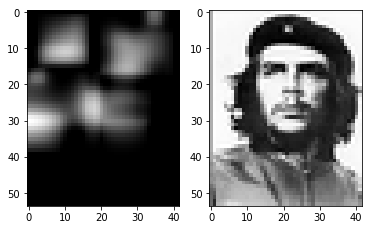

In [297]:

fig =plt.figure()
ax=fig.add_subplot(121)
ax.imshow(y, cmap='gray')

ax=fig.add_subplot(122)
ax.imshow(img, cmap='gray')
plt.show()

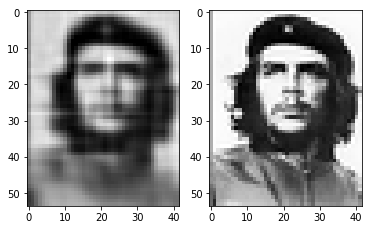

In [286]:

fig =plt.figure()
ax=fig.add_subplot(121)
ax.imshow(y_new, cmap='gray')

ax=fig.add_subplot(122)
ax.imshow(img, cmap='gray')
plt.show()

In [271]:
print(TSV(I_ans))
d_TSV(I_ans)
F_TSV(d, A_ten, I_ans,1)
print (I_ans)

131.35475158691406
[[0.67843133 0.98039216 0.972549   ... 0.97647065 0.97647065 0.972549  ]
 [0.68235296 0.99607843 0.9843137  ... 0.9921568  0.9921568  0.9908497 ]
 [0.68235296 0.9921568  0.98039216 ... 0.9843137  0.9843137  0.9882353 ]
 ...
 [0.4        0.28627452 0.654902   ... 0.530719   0.606536   0.40784314]
 [0.40392157 0.14901961 0.6653595  ... 0.6156863  0.627451   0.5372549 ]
 [0.41960785 0.15686275 0.7124183  ... 0.65882355 0.6627451  0.57254905]]
